# Classification Using Keras

## Reading Data and ETL

In [1]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt

In [3]:
# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

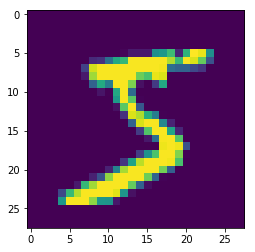

In [5]:
plt.imshow(X_train[0])

In [6]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

In [7]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [8]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


# Build a Neural Network

In [9]:
# define classification model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','mae','mse','mape','cosine'])
    return model

In [10]:
# build the model
model = classification_model()

# fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 618s - loss: 0.1999 - acc: 0.9401 - mean_absolute_error: 0.0196 - mean_squared_error: 0.0091 - mean_absolute_percentage_error: 9803414.3470 - cosine_proximity: -9.4799e-01 - val_loss: 0.1094 - val_acc: 0.9646 - val_mean_absolute_error: 0.0108 - val_mean_squared_error: 0.0053 - val_mean_absolute_percentage_error: 5424588.8209 - val_cosine_proximity: -9.7023e-01
Epoch 2/10
 - 667s - loss: 0.0818 - acc: 0.9746 - mean_absolute_error: 0.0080 - mean_squared_error: 0.0039 - mean_absolute_percentage_error: 4006493.3998 - cosine_proximity: -9.7821e-01 - val_loss: 0.0746 - val_acc: 0.9777 - val_mean_absolute_error: 0.0072 - val_mean_squared_error: 0.0035 - val_mean_absolute_percentage_error: 3587638.2403 - val_cosine_proximity: -9.8051e-01
Epoch 3/10
 - 687s - loss: 0.0536 - acc: 0.9826 - mean_absolute_error: 0.005

In [11]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))        

Accuracy: 0.9799% 
 Error: 0.020100000000000007


In [12]:
model.save('classification_model.h5')

In [13]:
from keras.models import load_model

In [14]:
pretrained_model = load_model('classification_model.h5')

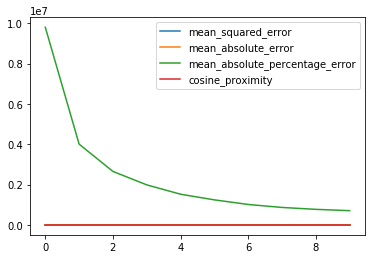

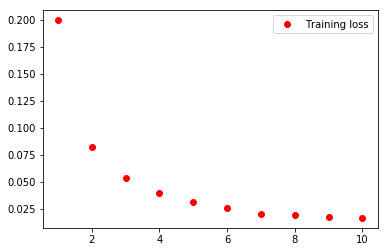

In [20]:
import matplotlib.pyplot as plt
loss = history.history['loss']
acc = history.history['mean_absolute_error']
val_loss = history.history['val_loss']
val_acc = history.history['val_mean_absolute_error']
mape_loss=history.history['mean_absolute_percentage_error']
cosine_los=history.history['cosine_proximity']
plt.plot(history.history['mean_squared_error'], label = 'mean_squared_error')
plt.plot(history.history['mean_absolute_error'], label = 'mean_absolute_error')
plt.plot(history.history['mean_absolute_percentage_error'], label = 'mean_absolute_percentage_error')
plt.plot(history.history['cosine_proximity'], label = 'cosine_proximity')
plt.legend()
plt.show()
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.legend()
plt.show()

y_pred = model.predict(X_test)


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_prob = model.predict(X_test) 
y_classes_predict = y_prob.argmax(axis=-1)
y_classes_real = [np.argmax(y, axis=None, out=None) for y in y_test]

print('Total accuracy:' ,(accuracy_score(y_classes_real,y_classes_predict)))
confusion_matrix(y_classes_real,y_classes_predict)

In [57]:
from sklearn.metrics import precision_recall_fscore_support as score


precision, recall, fscore, support = score(y_classes_real, y_classes_predict)

print('precision for each class: {}'.format(precision))
print('recall for each class: {}'.format(recall))
print('fscore for each class: {}'.format(fscore))
print('support for each class: {}'.format(support))

precision for each class: [0.98569969 0.9982238  0.98622047 0.97347741 0.98347107 0.96802646
 0.97830579 0.9815534  0.97821577 0.96289062]
recall for each class: [0.98469388 0.99030837 0.97093023 0.98118812 0.9694501  0.98430493
 0.98851775 0.98346304 0.96817248 0.97720515]
fscore for each class: [0.98519653 0.99425033 0.97851562 0.97731755 0.97641026 0.97609783
 0.98338525 0.98250729 0.97316821 0.96999508]
support for each class: [ 980 1135 1032 1010  982  892  958 1028  974 1009]
